In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time
%matplotlib inline

%run bandit_definitions.py
%run algorithms.py
%run sim_utilities.py

In [2]:
def Ntest(t):# Nombre de fois où l'on lance l'algorithme avant de faire la moyenne des regrets
    return 10
    #return int(2*np.sqrt(t))

# Sphere Constraints
 - conjecture : logarithmic regret ? 
 - careful : does not work when the circle is larger than the simplex !!!

In [68]:
np.random.seed(22)

K = 3

mus = np.random.rand(K)
noise='gaussian'

#r = 1/(2*K)
r = np.sqrt(1 + 1/(K-1))/K #maximal radius included in the simplex
r2 = (np.sqrt(1 + 1/(K-1))/K)*0.9
C = SphereConstraints(K, r2)

band_list = [FairBand(K, mus, C, noise=noise),
            ]

delta_max = [band.C.argmax_dot(mus).fun -(- band.C.argmax_dot(-mus).fun) for band in band_list]
print(delta_max)

[0.14901564401127348]


In [69]:
T = 30000

eps = 1.
alg_list = [#FairUCB(K, C, label='Fair kl-UCB', noise="bernoulli"),
            #FairUCB(K, C, label='Fair UCB', noise="gaussian"),
            #L1OFUL(K, C, label="L1OFUL", delta=1/T),
            #FairEpsGreedy(K, C, label=r'$\epsilon$-greedy, $\epsilon =$'+str(eps), epsilon=eps), 
            FairEpsGreedy(K, C, label="FTL", epsilon=0)
           ]

data_dict={
        'name':'Regret on a set with smooth border',
        'short_name':'sphere_cons',
        'T':T,
        'Ntest':Ntest,
        'band_list':band_list,
        'alg_list':alg_list,
        'results':None,   
    }

launch(data_dict, fair_reg=True)

Run number  0  /  10
Run number  5  /  10
FTL  took  28.56991195678711  total, i.e.  2.856991195678711  per run


worst possible perf :  [4470.46932034]


<Figure size 432x288 with 0 Axes>

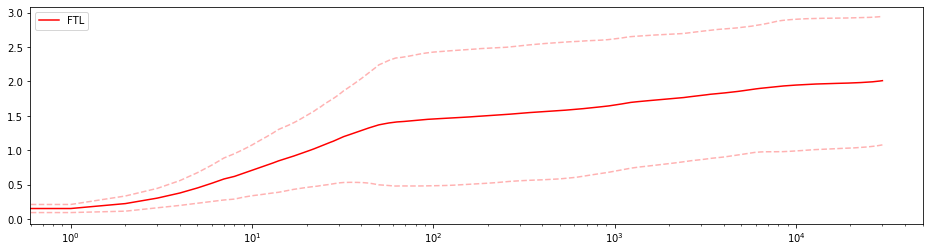

In [70]:
%run sim_utilities.py
plot_and_save(data_dict, skip_algs=[],  save_data=False)

print('worst possible perf : ',str(T * np.array(delta_max)))

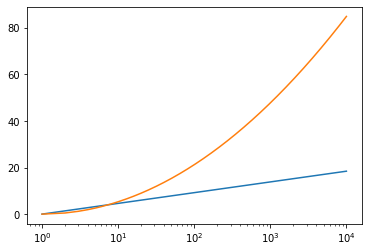

In [84]:
xs = np.arange(1, 10000)
plt.xscale('log')
plt.plot(xs, 2*np.log(xs))
plt.plot(xs, np.power(np.log(xs), 2))
#plt.plot(xs, 2*np.sqrt(xs))
#plt.plot(xs, xs)

# Uniform constraints : lower vs. upper bounds on each action

In [ ]:
np.random.seed(1919)

K = 3
mus = np.sort(np.random.rand(K))
noise='gaussian'

up_const = True
eps = 1/K**2
if up_const:## if us > (1/(K-1) then log regret)
    us = [1/(K-1) for _ in  range(K)]
    constraints_list = [(0, us[i], np.array([1*(j==i) for j in range(K)])) for i in range(K)]
else:
    ls = [1/K - eps for _ in range(K)]
    constraints_list = [(ls[i], 1, np.array([1*(j==i) for j in range(K)])) for i in range(K)]
C = PolytopeConstraints(K, constraints_list)

band_list = [FairBand(K, mus, C, noise=noise)]

min_reward = C.argmax_dot(-mus)
max_reward = C.argmax_dot(mus)
print(max_reward)
delta_max =  max_reward.fun - (- min_reward.fun)
#print("Un point qui vérifie les contraintes : ", C.feasible)
print("Ecart maximum pour ce problème : ", delta_max)

In [ ]:
T = 3000

eps = 1.
alg_list = [FairUCB(K, C,label='FairUCB'),
            #L1OFUL(K, C, label='OFUL', delta=1/T)
           ]

data_dict={
        'name':'Uniform lower bounds or upper bounds on each action',
        'short_name':'unif_bounds',
        'T':T,
        'Ntest':Ntest,
        'band_list':band_list,
        'alg_list':alg_list,
        'results':None,   
    }

launch(data_dict)

In [ ]:
%run sim_utilities.py
plot_and_save(data_dict, save_data=False)

print('worst possible perf : ',str(T*delta_max))

# Transition from logarithmic to bounded regret
- pour les contraintes fixées ici, si $\mu^\star = \mu_1 ou \mu_2$ alors le regret (des algorithmes consistants) est censé être surlogarithmique. En revnache, si $\mu^\star = \mu_3$ alors le regret peut-être constant. 

In [62]:
np.random.seed(0)
K = 3

l = 0.2
ls = [0]+[l for _ in range(K-1)]
constraints_list = [(ls[i], 1, np.array([1*(j==i) for j in range(K)])) for i in range(K)]
C = PolytopeConstraints(K, constraints_list)

delta = np.array([0.05, 0, -0.05])
mus = np.array([ 1/2, 1/3, 1/2])
mus_list = [mus-2*delta, mus-delta, mus ,mus+delta, mus+2*delta]
noise = "gaussian" # either "gaussian" or "bernoulli"

min_reward, max_reward = C.argmax_dot(-mus), C.argmax_dot(mus)
print(max_reward)
delta_max =  max_reward.fun - (- min_reward.fun)
#print("Un point qui vérifie les contraintes : ", C.feasible)
print("Ecart maximum pour ce problème : ", delta_max)

band_list = [FairBand(K, mus, C, noise=noise) for mus in mus_list]

     con: array([0.])
     fun: 0.4666666666666667
 message: 'Optimization terminated successfully.'
     nit: 0
   slack: array([0.6, 0.4, 0. , 0.8, 0. , 0.8])
  status: 0
 success: True
       x: array([0.6, 0.2, 0.2])
Ecart maximum pour ce problème :  0.09999999999999998


In [78]:
T = 10000

#eps = 1.
alg_list = [#FairUCB(K, C, label='Fair kl-UCB', noise="bernoulli"),
            FairUCB(K, C, label='Fair UCB', noise="gaussian"),
            #L1OFUL(K, C, label="L1OFUL", delta=1/T),
            #FairEpsGreedy(K, C, label=r'$\epsilon$-greedy, $\epsilon =$'+str(eps), epsilon=eps), 
            FairEpsGreedy(K, C, label="FTL", epsilon=0),
           ]

data_dict={
        'name':'Transition from logarithmic to bounded regret',
        'short_name':'logvbounded_'+noise+'_FTL',
        'T':T,
        'Ntest':Ntest,
        'band_list':band_list,
        'alg_list':alg_list,
        'results':None,   
    }

launch(data_dict, fair_reg=True)

Run number  0  /  40
Run number  5  /  40
Run number  10  /  40
Run number  15  /  40
Run number  20  /  40
Run number  25  /  40
Run number  30  /  40
Run number  35  /  40
Fair UCB  took  661.004775762558  total, i.e.  16.52511939406395  per run
Run number  0  /  40
Run number  5  /  40
Run number  10  /  40
Run number  15  /  40
Run number  20  /  40
Run number  25  /  40
Run number  30  /  40
Run number  35  /  40
FTL  took  680.902364730835  total, i.e.  17.022559118270873  per run
Run number  0  /  40
Run number  5  /  40
Run number  10  /  40
Run number  15  /  40
Run number  20  /  40
Run number  25  /  40
Run number  30  /  40
Run number  35  /  40
Fair UCB  took  668.5574688911438  total, i.e.  16.713936722278596  per run
Run number  0  /  40
Run number  5  /  40
Run number  10  /  40
Run number  15  /  40
Run number  20  /  40
Run number  25  /  40
Run number  30  /  40
Run number  35  /  40
FTL  took  653.1301879882812  total, i.e.  16.32825469970703  per run
Run number  0 

<Figure size 432x288 with 0 Axes>

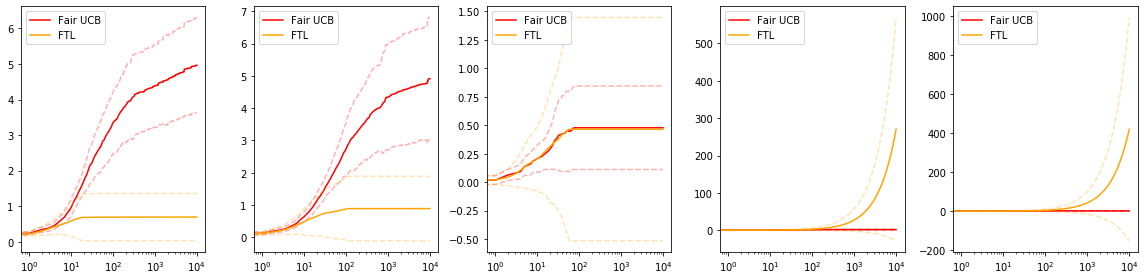

In [83]:
%run sim_utilities.py

#data_dict['short_name'] = 
plot_and_save(data_dict, save_data=False, skip_algs=[])

#print('worst possible perf : ',str(T*delta_max))

# General constraints

## Mode d'emploi : 

La cellule juste en dessous sert à générer un problème de bandit. Comme on génère les contraintes aléatoirement, il se peut qu'elles ne soient pas réalisables. Dans ce cas il faut relancer la cellule jusqu'à ce qu'elle affiche ''Optimization terminated successfully.''

K est la dimension du problème
n_cons le nombre de contraintes
C est un objet contrainte, qui implémente les fonctions de base, en particulier optimiser. Pour l'initialiser, on donne une liste de triplets $\big($l(ower), u(pper), s$\big)$ où s est un vecteur dans $\{0, 1\}^K$

In [ ]:
K = 5

mus = np.random.rand(K)
mus_list = [mus]

n_cons = 3
constraints_list = [(0.7*np.random.rand(), 1,np.array([1*(np.random.rand() > 1/2) for _ in range(K)])) for _ in range(n_cons)]
C = PolytopeConstraints(K, constraints_list)

band_list = [FairBand(K, mus, C, noise=noise)]

min_reward = C.argmax_dot(-mus)
max_reward = C.argmax_dot(mus)
print(max_reward)
delta_max =  max_reward.fun - (- min_reward.fun)
print("Un point qui vérifie les contraintes : ", C.feasible)
print("Ecart maximum pour ce problème : ", delta_max)

Ici on met la liste d'algorithmes que l'on souhaite tester

In [ ]:
T = 5000

alg_list = [FairUCB(K, C, label='FairUCB'),
            L1OFUL(K, C, label='OFUL', delta=1/T),
           ]

data_dict={
        'name':'General case',
        'short_name':'gen_case',
        'T':T,
        'Ntest':Ntest,
        'band_list':band_list,
        'alg_list':alg_list,
        'results':None,   
    }

launch(data_dict, fair_reg=True)

In [ ]:
print(data_dict['name'])
plot_and_save(data_dict, save_data=False, skip_algs=[1])

print('worst possible perf : ',str(T*delta_max))

In [18]:
a = [1,2,3,4]
b = [5,6]*2
c  = zip(a, b)
print([x for x in c])

[(1, 5), (2, 6), (3, 5), (4, 6)]
